# Setup Environment

---
Setup environment mengacu pada proses menyiapkan semua alat, pustaka, dan konfigurasi yang diperlukan untuk menjalankan aplikasi atau proyek tertentu. Dalam konteks pengembangan perangkat lunak atau proyek data sains, ini termasuk menginstal pustaka, alat pengembangan, dan memastikan semua dependensi telah terpenuhi sehingga kode dapat dijalankan tanpa masalah. Proses ini penting untuk memastikan konsistensi dan efisiensi dalam pengembangan dan penerapan proyek.

Instalasi Libraries dan Packages

In [ ]:
# Install terlebih dahulu peralatan utama Deep Learning dan Machine Learning
!pip install torch scipy

# torch: pustaka deep learning untuk komputasi tensor dengan akselerasi GPU.
# scipy: pustaka komputasi ilmiah yang dibangun di atas NumPy.

In [ ]:
# Install pustaka tambahan untuk Natural Language Processing
!pip install nltk transformers

# nltk: pustaka untuk pemrosesan bahasa alami, termasuk tokenisasi, stemming, dan analisis teks.
# transformers: pustaka yang menyediakan berbagai model bahasa besar seperti HuggingFace, BERT, GPT, dan lainnya.

In [ ]:
# Install terlebih dahulu peralatan utama untuk analisis data dan visualisasi
!pip install jsonify numpy pandas matplotlib plotly seaborn

# jsonify: Pustaka untuk mengkonversi objek Python menjadi format JSON (bisa jadi berasal dari Flask atau lainnya).
# numpy: Pustaka untuk komputasi numerik, menyediakan dukungan untuk array besar dan matriks.
# pandas: Pustaka untuk manipulasi dan analisis data, sangat berguna untuk bekerja dengan data tabel.
# matplotlib: Pustaka untuk membuat visualisasi statis, animasi, dan interaktif dalam Python.
# plotly: Pustaka untuk membuat visualisasi interaktif yang dapat dipublikasikan di web.
# seaborn: Pustaka untuk membuat visualisasi statistik yang menarik dan informatif, dibangun di atas matplotlib.

In [ ]:
# Install pustaka scikit-learn untuk model machine learning
!pip install scikit-learn

# scikit-learn: Pustaka untuk machine learning yang menyediakan alat-alat untuk klasifikasi, regresi, clustering, pengurangan dimensi, model seleksi, dan praproses data.

In [ ]:
# Libraries tambahan , data cleaning

!pip install spacy wordcloud

# spaCy: Pustaka pemrosesan bahasa alami (NLP) yang sangat cepat dan berkinerja tinggi.
# WordCloud: Pustaka untuk membuat visualisasi word cloud.

Google Colab Things

In [ ]:
# Import library untuk menghubungkan dan mengakses Google Drive
from google.colab import drive
# Mount (mengaitkan) Google Drive ke sesi runtime saat ini
drive.mount('/content/drive')

# Import library untuk mengunggah file dari lokal ke Google Colab
from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Collection

---
Data collection adalah proses pengumpulan informasi atau data dari berbagai sumber untuk dianalisis dan digunakan dalam pengambilan keputusan. Proses ini melibatkan pengumpulan data secara sistematis dan terorganisir untuk memastikan bahwa data yang dikumpulkan akurat, relevan, dan lengkap. Data collection dapat dilakukan melalui berbagai metode, termasuk survei, wawancara, observasi, dan eksperimen.

Import-Import Libraries

In [ ]:
# Import pustaka-pustaka untuk deep learning dan pemrosesan bahasa alami
import torch
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
from transformers import pipeline

# Import pustaka-pustaka untuk manipulasi dan pemrosesan data & file
import json
import string

Inisialisasi Model Hf & Model Translate

In [ ]:
# Nama model yang akan digunakan
model_name = 'tuner007/pegasus_paraphrase'

# Tentukan perangkat keras yang akan digunakan (GPU jika tersedia, jika tidak CPU)
torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Inisialisasi tokenizer dari model Pegasus yang telah diunduh sebelumnya
tokenizer = PegasusTokenizer.from_pretrained(model_name)

# Inisialisasi model Pegasus untuk generasi kondisional dari model yang telah diunduh sebelumnya
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(torch_device)

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at tuner007/pegasus_paraphrase and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Inisialisasi pipeline untuk terjemahan dari bahasa Inggris ke bahasa Indonesia
transpipe = pipeline("translation", model="Helsinki-NLP/opus-mt-en-id")

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Inisialisasi Fungsi Parafrase dan Remove Duplikasi

In [ ]:
def get_paraphrase(input_text, num_return_sequences=3, num_beams=10):
    # Tokenisasi teks input menggunakan tokenizer yang terkait dengan model Pegasus.
    # Teks input ditempatkan ke dalam sebuah list dan parameter lainnya diatur seperti truncation, padding, dan max_length.
    # Batch hasil tokenisasi diubah menjadi tensor PyTorch dan dipindahkan ke perangkat torch yang ditentukan (GPU atau CPU).
    batch = tokenizer([input_text], truncation=True, padding='longest', max_length=60, return_tensors="pt").to(torch_device)

    # Menghasilkan parafrase menggunakan model Pegasus yang telah dilatih sebelumnya.
    # Model menghasilkan urutan berdasarkan batch tokenisasi input yang diberikan.
    # Berbagai parameter seperti max_length, num_beams, num_return_sequences, dan temperature diatur untuk generasi.
    translated = model.generate(**batch, max_length=60, num_beams=num_beams, num_return_sequences=num_return_sequences, temperature=1.5)

    # Mendekode token ID yang dihasilkan menjadi teks.
    # Token khusus dilewati selama dekode untuk mendapatkan teks parafrase akhir.
    tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)

    # Mengembalikan list dari teks parafrase.
    return tgt_text

In [ ]:
def remove_duplicates(input_list):
    # Membuat kamus dari list input. Karena kamus tidak dapat memiliki kunci duplikat,
    # ini secara otomatis menghapus duplikat dari list sambil mempertahankan urutan elemen.
    unique_dict = dict.fromkeys(input_list)

    # Mengonversi kunci kamus kembali menjadi sebuah list.
    # Ini efektif menghapus duplikat dari list input.
    unique_list = list(unique_dict)

    # Mengembalikan list tanpa duplikat.
    return unique_list

Start Data Collection

In [ ]:
def main():
    intents = []
    stop_words = {"Quit", "No", "Escape", "Q", "Esc", "Stop", "Done", "quit", "no", "escape", "q", "esc", "stop", "done"}

    while True:
        # Meminta input tag dari pengguna
        tag = input("Masukkan tag: ").strip()
        # Keluar dari loop jika input adalah salah satu stop word
        if tag.lower() in stop_words:
            break

##################   PATTERNS   ##################

        patterns = []
        while True:
            # Meminta input pola dari pengguna
            pattern = input("Masukkan pola (atau ketik 'done' untuk menghentikan penambahan pola): ").strip()
            # Keluar dari loop jika input adalah salah satu stop word
            if pattern.lower() in stop_words:
                break
            # Terjemahkan pola ke bahasa Indonesia
            indopat = transpipe(pattern)
            indo_pattern = indopat[0]['translation_text']
            patterns.append(indo_pattern)

            # Dapatkan parafrase dari pola
            pattern_paraphrases = get_paraphrase(pattern)
            patterns.append(pattern)
            patterns.extend(pattern_paraphrases)

            # Terjemahkan parafrase pola ke bahasa Indonesia
            pattern_translation = []
            for translate in pattern_paraphrases:
                result = transpipe(translate)
                translation_pattern = result[0]['translation_text']
                pattern_translation.append(translation_pattern)
            patterns.extend(pattern_translation)

            # Hapus duplikat dari daftar pola
            patterns = remove_duplicates(patterns)

##################   RESPONSES   ##################

        responses = []
        while True:
            # Meminta input tanggapan dari pengguna
            response = input("Masukkan tanggapan (atau ketik 'done' untuk menghentikan penambahan tanggapan): ").strip()
            # Keluar dari loop jika input adalah salah satu stop word
            if response.lower() in stop_words:
                break
            # Terjemahkan tanggapan ke bahasa Indonesia
            indores = transpipe(response)
            indo_response = indores[0]['translation_text']
            responses.append(response)

            # Dapatkan parafrase dari tanggapan
            response_paraphrases = get_paraphrase(response)
            responses.append(indo_response)
            responses.extend(response_paraphrases)

            # Terjemahkan parafrase tanggapan ke bahasa Indonesia
            response_translation = []
            for translate in response_paraphrases:
                result = transpipe(translate)
                translation_response = result[0]['translation_text']
                response_translation.append(translation_response)
            responses.extend(response_translation)

            # Hapus duplikat dari daftar tanggapan
            responses = remove_duplicates(responses)

##################   DATASET FILE   ##################

        # Buat objek intent dengan tag, pola, dan tanggapan
        intent = {
            "tag": tag,
            "patterns": patterns,
            "responses": responses
        }

        # Tambahkan intent ke daftar intents
        intents.append(intent)
        print(f"Ditambahkan intent: {intent}")
        print(intents)

        # Simpan intents ke dalam file intents.json
        with open('intents.json', 'w') as f:
            json.dump({"intents": intents}, f, indent=4)
            print("Intents disimpan ke intents.json")

In [ ]:
main()

Masukkan tag: contoh
Masukkan pola (atau ketik 'done' untuk menghentikan penambahan pola): pola1


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `1.5` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Masukkan pola (atau ketik 'done' untuk menghentikan penambahan pola): pola2
Masukkan pola (atau ketik 'done' untuk menghentikan penambahan pola): pola3
Masukkan pola (atau ketik 'done' untuk menghentikan penambahan pola): q
Masukkan tanggapan (atau ketik 'done' untuk menghentikan penambahan tanggapan): respon1
Masukkan tanggapan (atau ketik 'done' untuk menghentikan penambahan tanggapan): respon2
Masukkan tanggapan (atau ketik 'done' untuk menghentikan penambahan tanggapan): q
Ditambahkan intent: {'tag': 'contoh', 'patterns': ['pola1', 'Pola1', 'There is a pola1', 'Pola1paper size', 'Ada sebuah pola1', 'pola2', 'Pola2', 'Pola2.', 'Pola2paper size', 'pola3', 'Pola3', 'There is a pola3', 'Pola3paper size', 'Ada sebuah pola3'], 'responses': ['respon1', "It's called respon1", 'It is called respon1', 'Ini disebut respon1', 'Hal ini disebut respon1', 'respon2', 'respon2 is a song.', "It's called respon2", 'respon2 adalah sebuah lagu.', 'Ini disebut respon2']}
[{'tag': 'contoh', 'patterns': [

Download filenya

# Data Cleaning, Transformation, Pre-processing, dann Mini-Visualization

---
- Data Cleaning melibatkan identifikasi dan penanganan terhadap nilai-nilai yang tidak valid, hilang, atau tidak konsisten dalam dataset. Ini dapat mencakup penghapusan entri duplikat, pengisian nilai yang hilang, atau bahkan penghapusan outlier yang tidak wajar yang dapat memengaruhi keakuratan analisis.

- Data Transformation melibatkan pengubahan struktur atau format data agar sesuai dengan kebutuhan analisis. Ini bisa termasuk transformasi variabel, seperti pengkodean ulang kategori, normalisasi skala data, atau transformasi non-linear untuk meningkatkan distribusi data.

- DataPre-processing adalah tahapan yang lebih luas yang mencakup kedua langkah sebelumnya bersama dengan langkah-langkah tambahan seperti tokenisasi (pemisahan teks menjadi unit-unit yang lebih kecil), stemming atau lemmatisasi (normalisasi kata-kata ke bentuk dasarnya), dan vektorisasi (mengubah teks menjadi representasi numerik).

- Data Mini-Visualization adalah visualisasi mini data seperti dataframe saja, dll.

Import-Import Libraries & Packages

In [ ]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt # Mengimpor modul pyplot dari Matplotlib dengan alias plt
import matplotlib.image as mpimg # Mengimpor modul image dari Matplotlib dengan alias mpimg
import pandas as pd # Impor pencipta/penyangga dataframe
import numpy as np # Impor sistem kalkulasi
from util import JSONParser # Ini adalah parser pembuat dataframe di file parser.py
import re # Mengimpor modul untuk operasi regular expression
import nltk # Mengimpor library NLTK untuk pengolahan bahasa alami
import spacy # Mengimpor library SpaCy untuk pengolahan bahasa alami
from nltk.corpus import stopwords # Mengimpor daftar stopwords dari corpus NLTK
from nltk.stem import SnowballStemmer # Mengimpor SnowballStemmer dari NLTK untuk stemming kata
from nltk.tokenize import word_tokenize # Mengimpor fungsi word_tokenize dari NLTK untuk tokenisasi kata

Inisialisasi nltk

In [ ]:
# Download NLTK data yang dibutuhkan
nltk.download('punkt')
nltk.download('stopwords')

# Initialize model Spcay
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cleaning Manual Sedikit

In [ ]:
files.upload()

Output hidden; open in https://colab.research.google.com to view.

More Cleaning & Mixing Manual

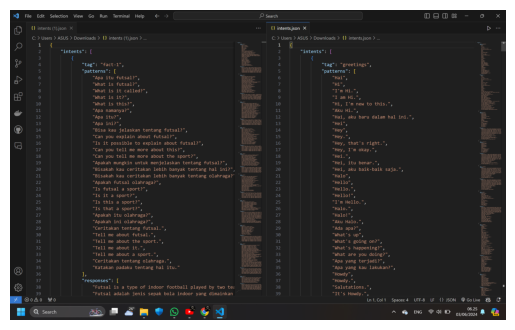

In [ ]:
# Membaca gambar dari path yang telah ditentukan dan menyimpannya dalam variabel img
img = mpimg.imread('/content/Screenshot 2024-06-03 062549.png') #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()
# Menampilkan gambar yang telah dimodifikasi atau diproses sebelumnya ke dalam jendela plot

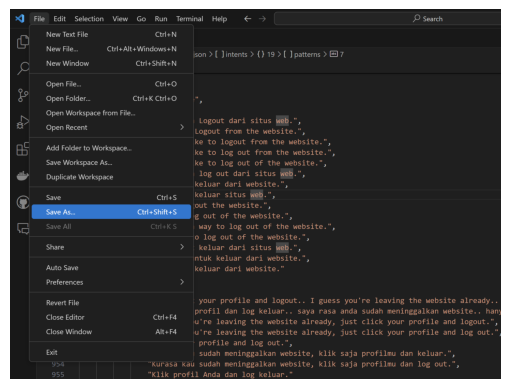

In [ ]:
img = mpimg.imread('/content/Screenshot 2024-06-03 063238.png') #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()

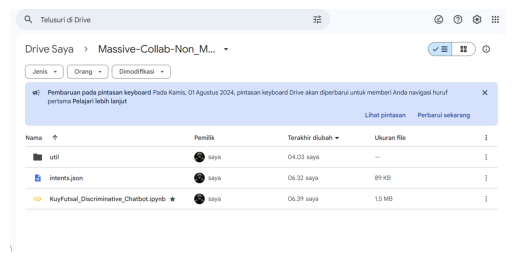

In [ ]:
img = mpimg.imread('/content/Screenshot 2024-06-03 063947.png') #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')A
plt.show()

Dataframing, Cleaning & Transformation

In [ ]:
#Menyalin (cp) direktori dan seluruh isinya dari '/content/drive/MyDrive/Massive-Collab-Non_Merge/util'
!cp -r /content/drive/MyDrive/Massive-Collab-Non_Merge/util /content
!cp -r /content/drive/MyDrive/Massive-Collab-Non_Merge/intents.json /content
# Gunakan -r untuk menyalin secara rekursif (termasuk subdirektori dan file di dalamnya).

In [ ]:
# load data
path = "/content/intents.json"

# buat objek JSONParser dan parse data intents.json
jp = JSONParser()
jp.parse(path)

# simpan dataframe dalam variabel df
df = jp.get_dataframe()

[INFO] Data JSON dikonversi menjadi DataFrame dengan bentuk: (650, 2)


In [ ]:
df.head()

,text_input,intents
0,Hai,greetings
1,Hi,greetings
2,I'm Hi.,greetings
3,I am Hi.,greetings
4,"Hi, I'm new to this.",greetings


In [ ]:
df.tail()

,text_input,intents
645,There are people who want to start playing Fut...,fact-10
646,There are tips for those who want to start pla...,fact-10
647,Ada orang-orang yang ingin mulai bermain olahr...,fact-10
648,Ada orang yang ingin mulai bermain Futsal.,fact-10
649,Ada tips untuk mereka yang ingin mulai bermain.,fact-10


In [ ]:
# hitung jumlah data per tag / inten
df.intents.value_counts()

intents
greetings     42
goodbyes      42
cs-four       33
fact-9        32
abouts        31
fact-1        30
cs-eight      30
cs-two        24
fact-2        24
cs-five       24
fact-4        23
fact-3        22
skills        22
fact-6        22
cs-three      21
cs-one        21
mornings      20
empties       19
nights        18
cs-six        16
thanksies     16
fact-5        16
creator       15
evenings      15
cs-nine       15
afternoons    14
fact-7        13
fact-8        12
cs-seven      10
fact-10        8
Name: count, dtype: int64

Visualisasi Data Sebelum Preprocess & Train

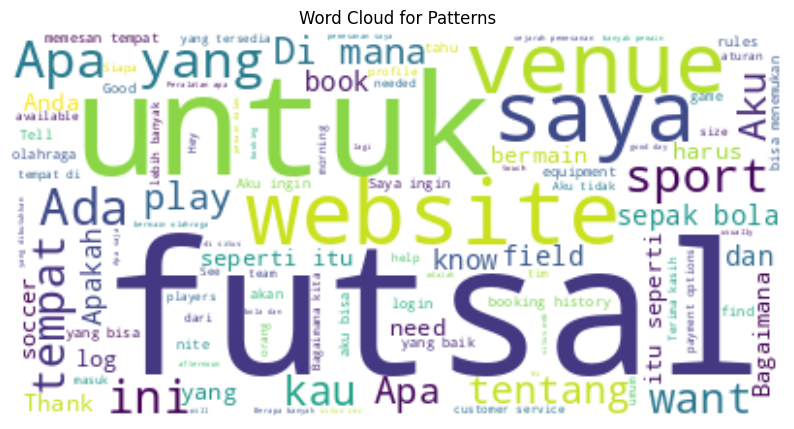

In [ ]:
# Generate a word cloud image
all_patterns = ' '.join(df['text_input'])
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(all_patterns)

# Display the generated image:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.title('Word Cloud for Patterns')
plt.show()

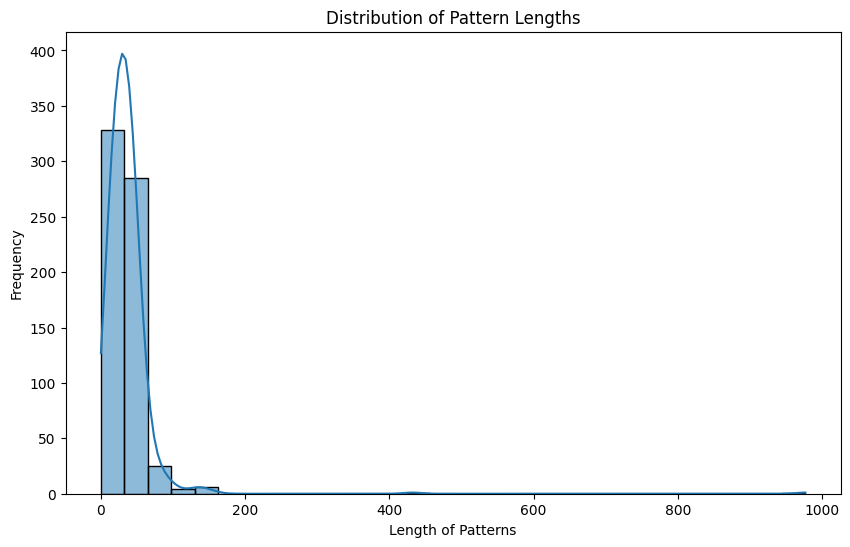

In [ ]:
df['pattern_length'] = df['text_input'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['pattern_length'], bins=30, kde=True)
plt.title('Distribution of Pattern Lengths')
plt.xlabel('Length of Patterns')
plt.ylabel('Frequency')
plt.show()

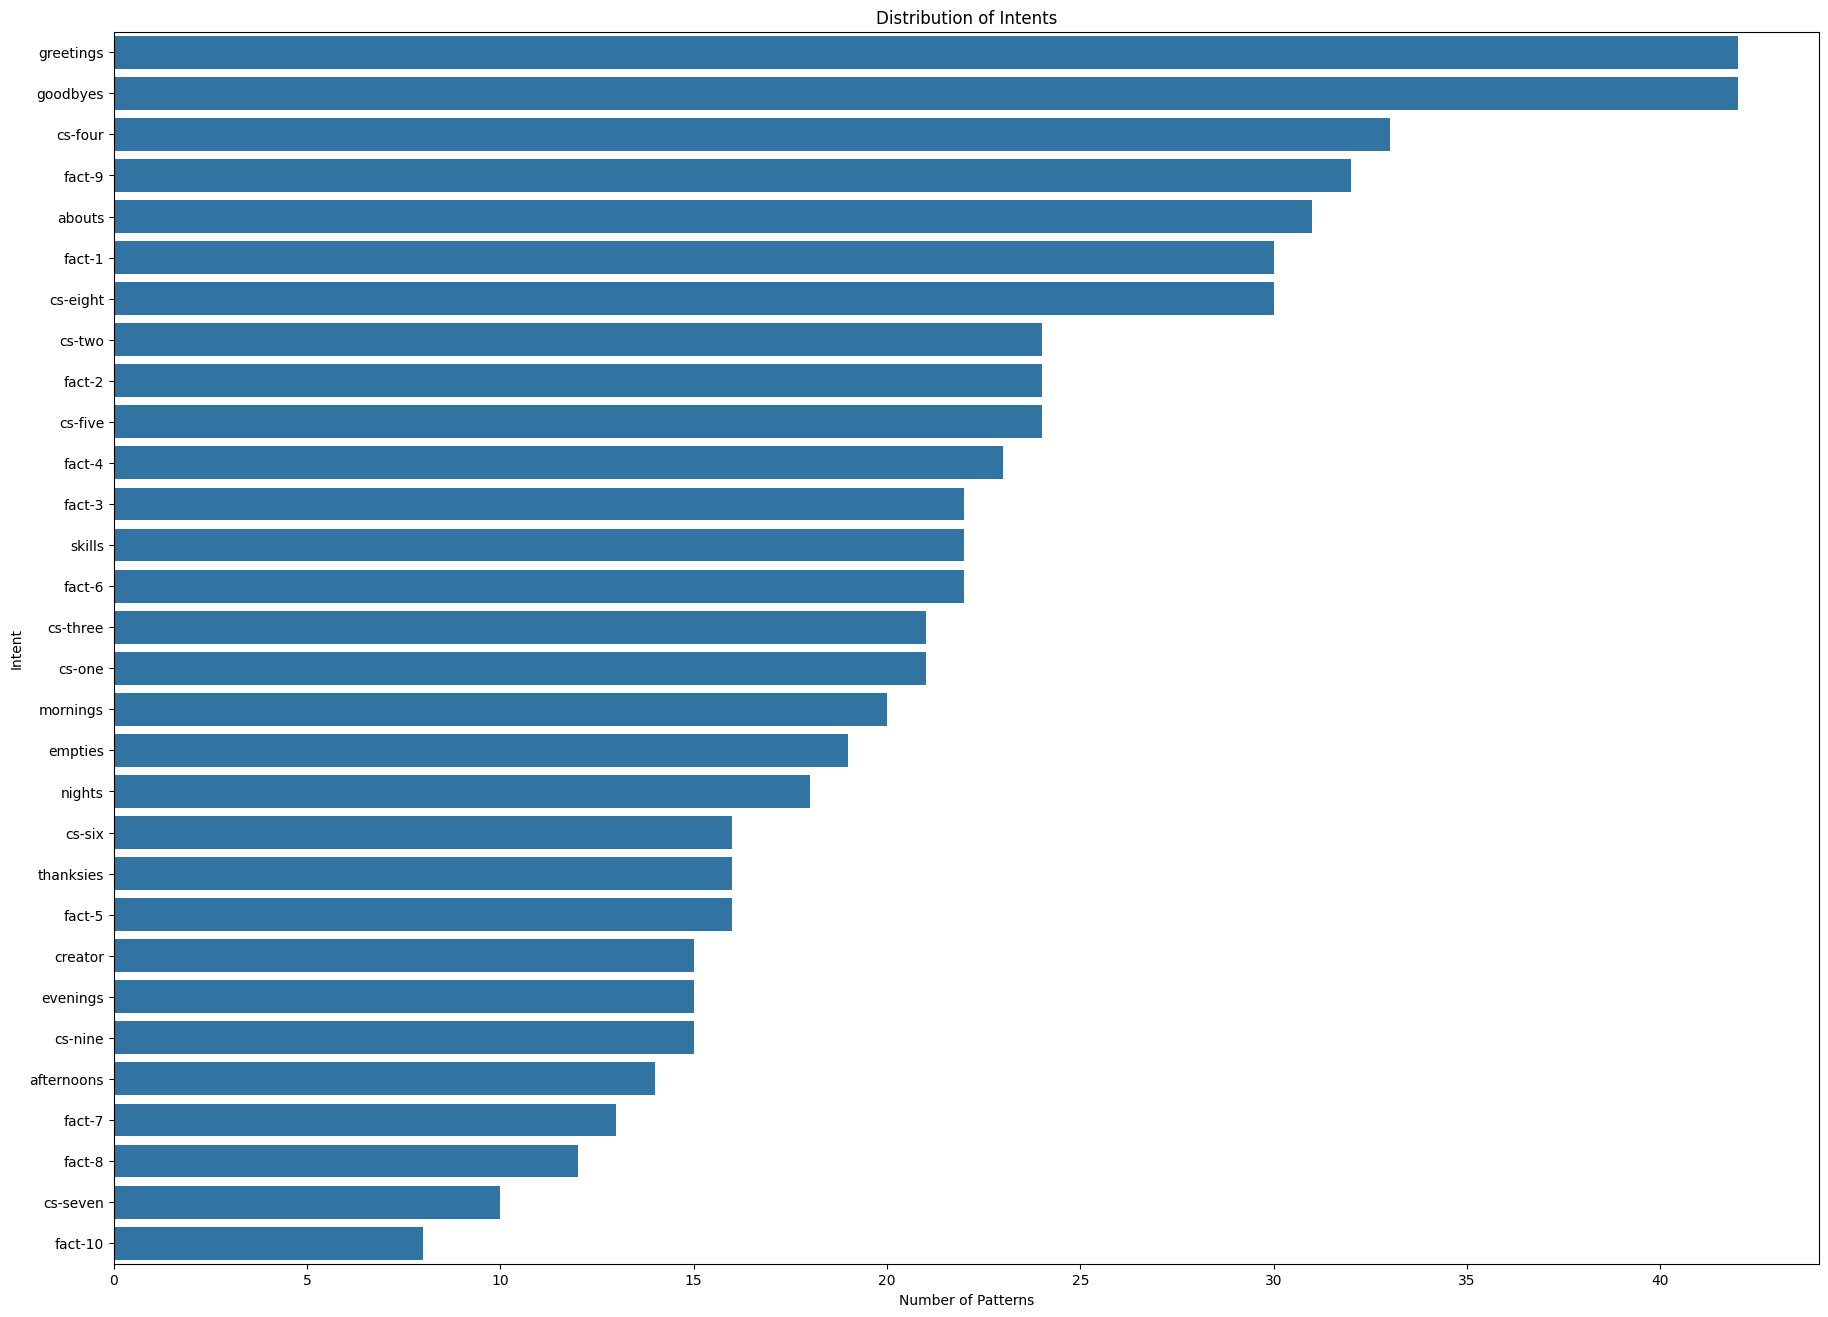

In [ ]:
plt.figure(figsize=(22, 16))
sns.countplot(y='intents', data=df, order=df['intents'].value_counts().index)
plt.title('Distribution of Intents')
plt.xlabel('Number of Patterns')
plt.ylabel('Intent')
plt.show()

Pre-Process Data

In [ ]:
df.sample(10)

,text_input,intents,pattern_length
463,Bisakah kau ceritakan lebih banyak tentang ola...,fact-1,52
32,Salutations.,greetings,12
366,Bagaimana kita menghubungi tim website?,cs-five,39
456,Bisa kau jelaskan tentang futsal?,fact-1,33
100,nite,nights,4
382,Tidak ada tempat yang tersedia di distrik ini.,cs-six,46
175,Is that correct?,empties,16
446,Ada cara untuk keluar dari website.,cs-nine,35
420,i wanna book and pay for a futsal venue what a...,cs-eight,69
498,What number of players do you have?,fact-2,35


In [ ]:
# Preprocess case folding
def case_folding(text):
    return text.lower()

def remove_unwanted_chars(text):
    return re.sub('[^a-zA-Z\'-]', ' ', text)

# # Preprocess hapus angka
# def remove_numbers(text):
#     return re.sub(r'\d+', '', text)

# Preprocess hapus extra whitespace
def remove_extra_whitespace(text):
    return ' '.join(text.split())

# Preprocess lemmatization
def lemmatization(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

In [ ]:
# Main preprocessing
def preprocess_text(text):
    """
    Fungsi yang digunakan untuk melakukan praproses
    """
    # konversi ke lowercase
    text = text.lower()
    # menghapus tanda baca
    unwantedchars = ["'", "-"]
    tandabaca = tuple(c for c in string.punctuation if c not in unwantedchars)
    text = ''.join(ch for ch in text if ch not in tandabaca)
    return text

def last_preprocess(text):
    text = case_folding(text)
    text = remove_unwanted_chars(text)
    # text = remove_numbers(text)
    text = remove_extra_whitespace(text)
    text = lemmatization(text)
    return text

# Preprocessing function YANG AKAN DIGUNAKAN
def end_preprocess(text):
    text = re.sub('[^a-zA-Z\'-]', ' ', text)  # Keep only alphabets and apostrophes
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Split into words
    text = " ".join(text)  # Rejoin words to ensure clean spacing
    return text

Implementasi Preprocess

In [ ]:
# implementasikan fungsi preprocess ke string
df['text_input_prep'] = df.text_input.apply(preprocess_text)
df['text_input_prep'] = df.text_input_prep.apply(last_preprocess)
df['text_input_prep'] = df.text_input_prep.apply(end_preprocess)

In [ ]:
df

,text_input,intents,pattern_length,text_input_prep
0,Hai,greetings,3,hai
1,Hi,greetings,2,hi
2,I'm Hi.,greetings,7,i be hi
3,I am Hi.,greetings,8,i be hi
4,"Hi, I'm new to this.",greetings,20,hi i be new to this
...,...,...,...,...
645,There are people who want to start playing Fut...,fact-10,50,there be people who want to start play futsal
646,There are tips for those who want to start pla...,fact-10,51,there be tip for those who want to start play
647,Ada orang-orang yang ingin mulai bermain olahr...,fact-10,50,ada orang - orang yang ingin mulai bermain ola...
648,Ada orang yang ingin mulai bermain Futsal.,fact-10,42,ada orang yang ingin mulai bermain futsal


Drop Kolom Tidak Diperlukan

In [ ]:
# Menghapus kolom pattern_length dari DataFrame
df = df.drop(columns=['pattern_length'])

In [ ]:
# Tampilkan DataFrame untuk memastikan kolom telah dihapus
dfS

,text_input,intents,text_input_prep
0,Hai,greetings,hai
1,Hi,greetings,hi
2,I'm Hi.,greetings,i be hi
3,I am Hi.,greetings,i be hi
4,"Hi, I'm new to this.",greetings,hi i be new to this
...,...,...,...
645,There are people who want to start playing Fut...,fact-10,there be people who want to start play futsal
646,There are tips for those who want to start pla...,fact-10,there be tip for those who want to start play
647,Ada orang-orang yang ingin mulai bermain olahr...,fact-10,ada orang - orang yang ingin mulai bermain ola...
648,Ada orang yang ingin mulai bermain Futsal.,fact-10,ada orang yang ingin mulai bermain futsal


Cek Missing Values & Cleaning Terakhir kalau Necessary

In [ ]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()
missing_values_count

text_input         0
intents            0
text_input_prep    0
dtype: int64

In [ ]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

0.0

# Data Visualization

---
Data visualisasi adalah proses representasi data dalam bentuk visual atau grafis, seperti grafik, diagram, peta, atau animasi. Tujuan dari data visualisasi adalah untuk mempermudah pemahaman data, mengidentifikasi pola, tren, dan anomali, serta membantu dalam pengambilan keputusan.

In [ ]:
df['intents'].unique()

array(['greetings', 'mornings', 'afternoons', 'evenings', 'nights',
       'goodbyes', 'thanksies', 'empties', 'abouts', 'skills', 'creator',
       'cs-one', 'cs-two', 'cs-three', 'cs-four', 'cs-five', 'cs-six',
       'cs-seven', 'cs-eight', 'cs-nine', 'fact-1', 'fact-2', 'fact-3',
       'fact-4', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9',
       'fact-10'], dtype=object)

In [ ]:
df.describe()

,text_input,intents,text_input_prep
count,650,650,650
unique,646,30,600
top,Good morning.,greetings,selamat pagi
freq,2,42,4


In [ ]:
df.dtypes

text_input         object
intents            object
text_input_prep    object
dtype: object

In [ ]:
import plotly.graph_objects as go

intent_counts = df['intents'].value_counts()
fig = go.Figure(data=[go.Bar(x=intent_counts.index, y=intent_counts.values)])
fig.update_layout(title='Distribution of Intents', xaxis_title='Intents', yaxis_title='Count')
fig.show()

In [ ]:
# Visualisasi akhir

import json

with open('/content/intents.json', 'r') as f:
    data = json.load(f)

df_cek = pd.DataFrame(data['intents'])
df_cek

,tag,patterns,responses
0,greetings,"[Hai, Hi, I'm Hi., I am Hi., Hi, I'm new to th...","[Hi, Hai, I'm Hi., I am Hi., Hi, I'm new to th..."
1,mornings,"[Selamat pagi, Good morning, Good morning., Go...","[Good morning, i hope you had a good day and i..."
2,afternoons,"[Selamat siang., Good afternoon, Good day., Go...","[Good afternoon, i hope you had a good day and..."
3,evenings,"[Selamat malam, aku harap harimu menyenangkan ...","[Good evening, i hope you had a good day and i..."
4,nights,"[Selamat malam, Good night, Good night., It wa...","[Good night, if you have any questions about f..."
5,goodbyes,"[Selamat tinggal!, Goodbye!, goodbye!, It's ov...","[I'll see you soon., Aku akan melihat Anda seg..."
6,thanksies,"[Terima kasih!, Thanks!, Thank you!, Thanks a ...","[Happy to help!, Senang bisa membantu!, Happy ..."
7,empties,"[- Ya., , It's not like it's like it's like it...","[Sorry, i didn't understand you., Maaf, saya t..."
8,abouts,"[Siapa kau?, who are you?, Who are you?, What ...","[I have a lot of names actually, Kuysal, Kuybu..."
9,skills,"[Apa yang bisa kau lakukan?, what can you do?,...","[I can provide general customer service help, ..."


# Model Building & Training

---
Model building adalah proses merancang dan mengembangkan model prediktif atau deskriptif menggunakan data yang tersedia. Ini melibatkan pemilihan algoritma yang sesuai, ekstraksi fitur penting, dan transformasi data agar siap digunakan oleh model. Setelah model dirancang, tahap training dilakukan dengan melatih model menggunakan dataset yang telah dibagi menjadi data latih dan data uji. Proses ini melibatkan optimasi parameter model untuk meminimalkan kesalahan prediksi dan meningkatkan akurasi. Hasil akhirnya adalah model yang terlatih dan siap untuk digunakan dalam memprediksi atau mengklasifikasikan data baru dengan tingkat akurasi yang tinggi.

Import-Import Libraries & Packages

In [ ]:
# import library untuk serialisasi objek Python
import pickle

# import CountVectorizer dari sklearn untuk mengubah koleksi dokumen teks menjadi vektor fitur
from sklearn.feature_extraction.text import CountVectorizer

# import MultinomialNB dari sklearn untuk menerapkan klasifikasi Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# import make_pipeline dari sklearn untuk membuat pipeline yang menggabungkan beberapa langkah pemrosesan data
from sklearn.pipeline import make_pipeline

Vektorisasi

In [ ]:
# inisiasi objek CountVectorizer
vect = CountVectorizer()
# mengumpulkan vocab dari data teks yang sudah dilakukan praproses
vect.fit(df['text_input_prep'])

CountVectorizer()

In [ ]:
# lihat list vocab
vocab = list(vect.vocabulary_.keys()) # batasi hanya 10 vocab teratas
print(len(vocab))

570


In [ ]:
# lihat list vocab
list(vect.vocabulary_.keys())[:10] # batasi hanya 10 vocab teratas

['hai', 'hi', 'be', 'new', 'to', 'this', 'aku', 'baru', 'dalam', 'hal']

In [ ]:
# ubah data teks menjadi matriks
text_vect = vect.transform(df.text_input_prep)

text_vect

<650x570 sparse matrix of type '<class 'numpy.int64'>'
	with 3660 stored elements in Compressed Sparse Row format>

In [ ]:
"""Kita bisa lihat bahwa data teks kita sudah berubah menjadi bentuk sparse matrix (Opsional)
Jika anda orangnya sangat-sangat penasaran dengan hasil yang dibuat diatas,
kita coba lihat hasil matriksnya dengan bantuan pandas"""

pd.DataFrame(text_vect.toarray(), columns=vocab)

,hai,hi,be,new,to,this,aku,baru,dalam,hal,...,ensure,safe,while,enjoy,setiap,tips,mereka,mulai,tip,those
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
648,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Modelling, Test awal, dan Probability

In [ ]:
# deklarasi objek MultinomialNB
nb = MultinomialNB()

# training data, dengan X : text_vect dan y : intents
nb.fit(text_vect, df.intents)

MultinomialNB()

In [ ]:
# input string dari user
chat = input("Masukkan String : ")

# lakukan preproses
chat = preprocess_text(chat)

# ubah teks menjadi vektor
chat = vect.transform([chat])

# prediksi vektor teks kedalam model machine learning
res = nb.predict(chat)

# tampilkan hasil prediksi
print(f"Hasil prediksi : {res[0]}")

Masukkan String : Booking History
Hasil prediksi : cs-three


In [ ]:
# input string dari user
chat = input("Masukkan String : ")

# lakukan preproses
chat = preprocess_text(chat)

# ubah teks menjadi vektor
chat = vect.transform([chat])

# prediksi vektor teks kedalam model machine learning
res = nb.predict_proba(chat)

# ambil nilai probabilitas tertinggi
max_prob = max(res[0])
max_idx = np.argmax(res[0])
print(f"Max Prob : {max_prob}\nMax Index: {max_idx}\nLabel: {nb.classes_[max_idx]}")

Masukkan String : Booking History
Max Prob : 0.8158516530891098
Max Index: 10
Label: cs-three


In [ ]:
pipeline = make_pipeline(
                        CountVectorizer(),
                        MultinomialNB(),
                        )

In [ ]:
# Training
pipeline.fit(df.text_input_prep, df.intents)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

Testing & Evaluasi

In [ ]:
# input string dari user
chat = input("Masukkan String : ")

# lakukan preproses
chat = preprocess_text(chat)

# prediksi teks kedalam pipeline
res = pipeline.predict_proba([chat])

# ambil nilai probabilitas tertinggi
max_prob = max(res[0])
max_idx = np.argmax(res[0])
print(f"Max Prob : {max_prob}\nMax Index: {max_idx}\nLabel: {nb.classes_[max_idx]}")

Masukkan String : Booking History
Max Prob : 0.8158516530891098
Max Index: 10
Label: cs-three


Re-Evaluate & Re-Validation

In [ ]:
print("Anda Terhubung dengan chatbot Kami")
while True:
    # input user
    chat = input("Anda : ")
    # praproses
    chat = preprocess_text(chat)
    # prediksi intent
    res = pipeline.predict_proba([chat])
    # ambil nilai probabilitas & lokasinya
    max_prob = max(res[0])
    max_idx = np.argmax(res[0])
    # kondisi jika probabilitas kurang dari threshold
    if max_prob < 0.20:
        print("Bot : Maaf Kak, aku ga ngerti")
    else:
        print(f"Bot : {jp.get_response(nb.classes_[max_idx])}")
    if nb.classes_[max_idx] == 'goodbyes':
        break

Anda Terhubung dengan chatbot Kami
Anda : Halo
Bot : Hello, what's up?
Anda : Bagaimana kamu bisa ada di sini? Siapa kamu?
Bot : I was created by a group of people led by Marco Philips with his team Bagas and Noneng.
Anda : Owalah, oke, Selamat pagi
Bot : Saya berharap Anda memiliki hari yang baik hari ini, tapi apa yang bisa saya bantu?
Anda : Bagaimana cara aku cek booking history?
Bot : Simply click on the calendar icon next to the profile picture to see the booking history.
Anda : Kalau mau memesan lapangan ? book a futsal venue gimana?
Bot : Pergi ke tab 'Sewa Lapangan', pilih salah satu bidang yang tersedia, periksa ketersediaan lapangan, pilih pemesanan, dan kemudian tinjau rinciannya.
Anda : kalau bayar? payment?
Bot : Anda dapat menggunakan E-Wallet seperti Dana dan Gopay, pilihan perbankan bergerak seperti Mandiri, dan BCA, dan Anda juga dapat membayar dengan VISA!
Anda : okeeedehh terimakasih banyaak thank you
Bot : Senang bisa membantu!
Anda : bye
Bot : Have a nice day/nigh

In [ ]:
with open("Kuysal_chatbot_pipeline.pkl", "wb") as model_file:
    pickle.dump(pipeline, model_file)

In [ ]:
print(
    """
    SELESAI SUDAH DATA & MODEL.
    """
)


    SELESAI SUDAH DATA & MODEL.
    


#Storaging Data & Model

In [ ]:
import shutil
import os

# Definisikan direktori sumber dan tujuan
source_dir = '/content/'
destination_dir = '/content/drive/MyDrive/Massive-Collab-Non_Merge/'  # Ganti 'destinasi' dengan nama folder tujuanmu di Google Drive

# Daftar file dan folder yang akan dikecualikan
exclude = {'drive', 'sample_data', '..'}

In [ ]:
# Buat folder tujuan jika belum ada
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Pindahkan semua file dari source_dir ke destination_dir dengan pengecualian
for filename in os.listdir(source_dir):
    file_path = os.path.join(source_dir, filename)

    # Periksa apakah file/folder ada dalam daftar pengecualian
    if filename not in exclude:
        try:
            destination_path = os.path.join(destination_dir, filename)
            if os.path.isfile(file_path):
                # Timpa file jika sudah ada di tujuan
                if os.path.exists(destination_path):
                    os.remove(destination_path)
                shutil.move(file_path, destination_dir)
            elif os.path.isdir(file_path):
                # Hapus folder jika sudah ada di tujuan
                if os.path.exists(destination_path):
                    shutil.rmtree(destination_path)
                shutil.move(file_path, destination_path)
        except Exception as e:
            print(f"Error moving {filename}: {e}")